In [2]:
! python -m pip install numpy matplotlib pandas scipy seaborn scikit-learn

  Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/12.8 MB 8.8 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.8 MB 9.5 MB/s eta 0:00:01
   ------------------ --------------------- 6.0/12.8 MB 10.1 MB/s eta 0:00:01
   ---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge

1. Problemdefinition

I detta projekt ska jag utveckla och utvärdera en ML-modell som kan prediktera sjukvårdförsäkringskostnader baserat på patientens bmi, kön, rökstatus och antal barn.


2. Få tillgång till datan

Läser in insurance.csv

In [3]:
df = pd.read_csv("data/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Hämtar information om datasetet.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Hämtar ut de första raderna.

In [5]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Delar data till training och test. En EDA analys kommer göras på träningsdatan.

In [6]:
train, test = train_test_split(df, test_size=0.2, random_state=40)

3. EDA och databearbetning

Information om träningsdatan.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 737 to 219
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   charges   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.9+ KB


In [8]:
train.describe()

,age,bmi,children,charges
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.447664,30.655925,1.099065,13319.694857
std,14.052906,6.034174,1.204722,12080.053549
min,18.000000,15.960000,0.000000,1135.940700
25%,27.000000,26.400000,0.000000,4832.368075
50%,40.000000,30.400000,1.000000,9401.175500
75%,51.000000,34.560000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visualisering på fördelningen av kategoriska variabler.

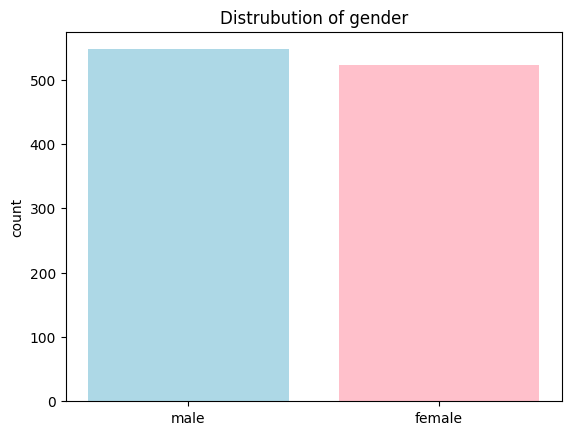

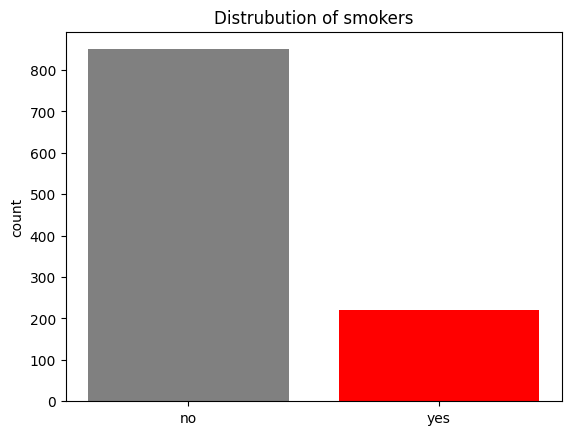

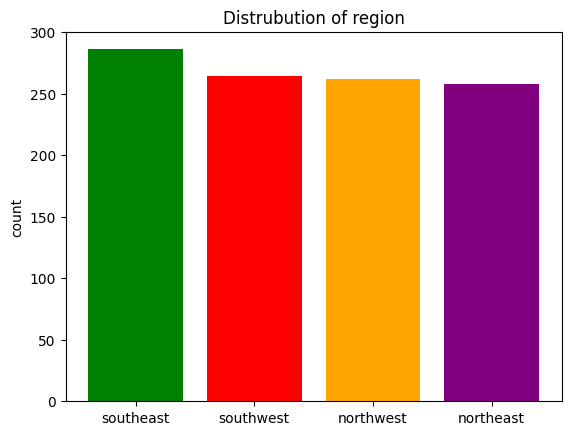

In [10]:
plt.bar(train['sex'].value_counts().index,train['sex'].value_counts().values, color=['lightblue', 'pink'])   
plt.title("Distrubution of gender")
plt.ylabel("count")
plt.show()

plt.bar(train['smoker'].value_counts().index,train['smoker'].value_counts().values, color=['grey', 'red'])   
plt.title("Distrubution of smokers")
plt.ylabel("count")
plt.show()

plt.bar(train['region'].value_counts().index,train['region'].value_counts().values, color=['green', 'red', 'orange', 'purple'])   
plt.title("Distrubution of region")
plt.ylabel("count")
plt.show()


Fördelning av numeriska värden

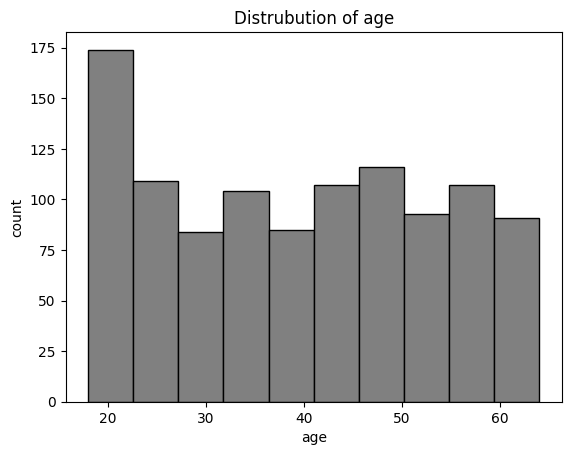

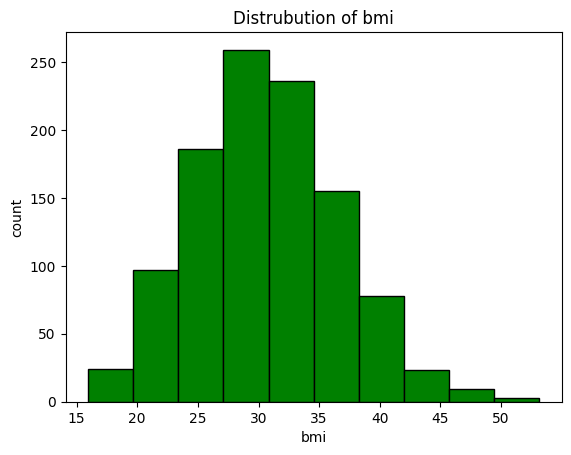

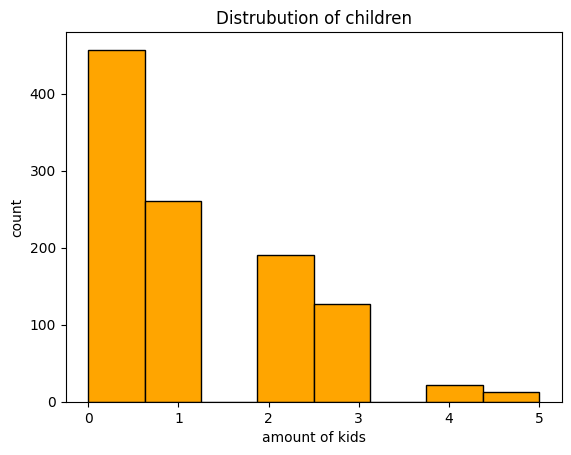

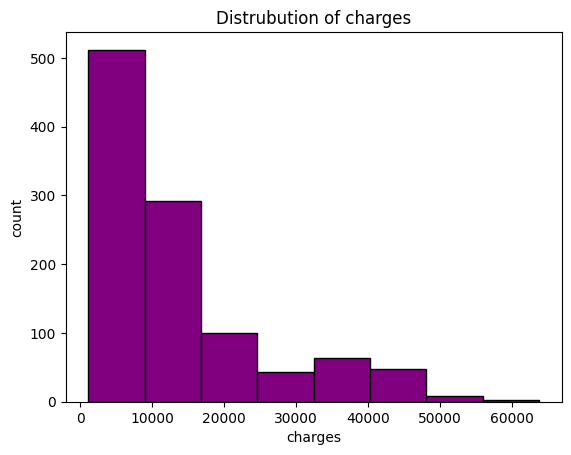

In [11]:
plt.hist(train['age'], edgecolor='black', color='grey')
plt.title('Distrubution of age')
plt.xlabel("age")
plt.ylabel("count")
plt.show()

plt.hist(train['bmi'], edgecolor='black', color='green')
plt.title('Distrubution of bmi')
plt.xlabel("bmi")
plt.ylabel("count")
plt.show()

plt.hist(train['children'],bins=8, edgecolor='black', color='orange')
plt.title('Distrubution of children')
plt.xlabel("amount of kids")
plt.ylabel("count")
plt.show()

plt.hist(train['charges'],bins=8, edgecolor='black', color='purple')
plt.title('Distrubution of charges')
plt.xlabel("charges")
plt.ylabel("count")
plt.show()

Låddiagram skapas för upptäcka eventuella outliers

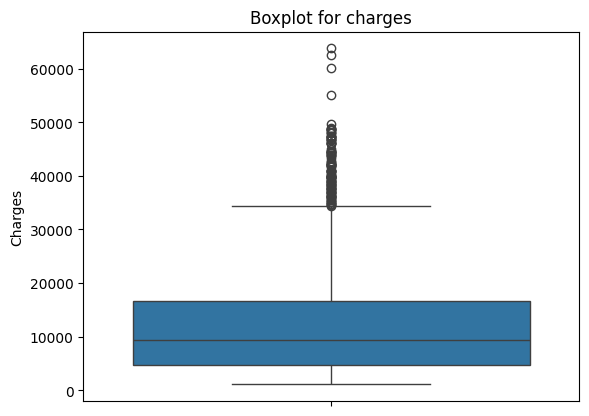

In [12]:
sns.boxplot(data=train['charges'])
plt.title("Boxplot for charges")
plt.ylabel('Charges')
plt.show()

In [ ]:
sns.boxplot(data=train['charges'])
plt.title("Boxplot for charges")
plt.ylabel('Charges')
plt.show()

outliers = train[(train['charges'] >= 52000)]
print(outliers)

train = train[(train['charges'] < 52000)]


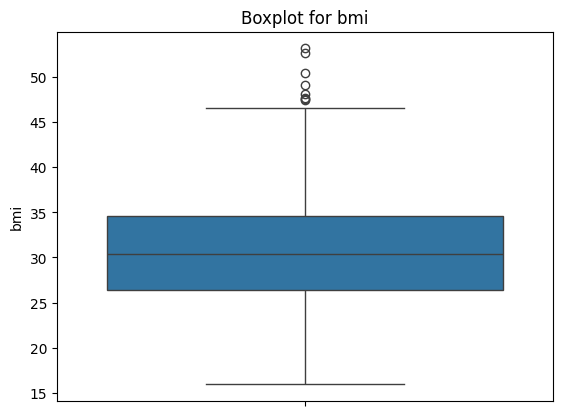

In [13]:
sns.boxplot(data=train['bmi'])
plt.title("Boxplot for bmi")
plt.ylabel('bmi')
plt.show()

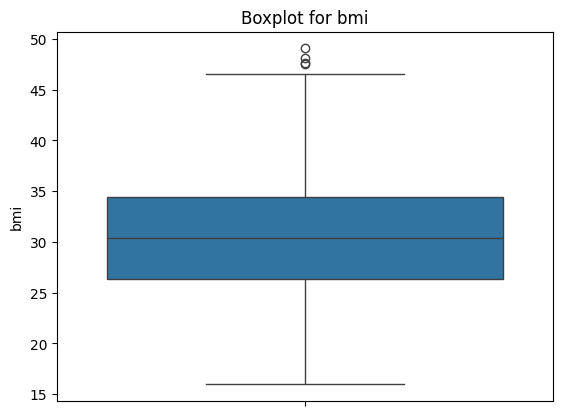

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [40]:
sns.boxplot(data=train['bmi'])
plt.title("Boxplot for bmi")
plt.ylabel('bmi')
plt.show()

outliers = train[(train['bmi'] >= 50)]
print(outliers)
train = train[(train['bmi'] < 50)]

4. Bearbetning av data

In [14]:
X_train = train.drop('charges', axis=1)
X_train

,age,sex,bmi,children,smoker,region
737,26,male,23.700,2,no,southwest
369,18,male,30.400,3,no,northeast
284,52,female,31.200,0,no,southwest
1302,25,female,20.800,1,no,southwest
958,43,male,34.960,1,yes,northeast
...,...,...,...,...,...,...
1330,57,female,25.740,2,no,southeast
1016,19,female,24.605,1,no,northwest
165,47,male,28.215,4,no,northeast
7,37,female,27.740,3,no,northwest


In [15]:
y_train = train['charges']
y_train

737      3484.33100
369      3481.86800
284      9625.92000
1302     3208.78700
958     41034.22140
           ...     
1330    12629.16560
1016     2709.24395
165     10407.08585
7        7281.50560
219     25081.76784
Name: charges, Length: 1070, dtype: float64

In [16]:
X_test = test.drop('charges', axis=1)
X_test

,age,sex,bmi,children,smoker,region
1099,25,female,33.990,1,no,southeast
759,18,male,38.170,0,yes,southeast
215,41,female,37.100,2,no,southwest
903,49,male,36.850,0,no,southeast
989,24,female,20.520,0,yes,northeast
...,...,...,...,...,...,...
408,38,male,21.120,3,no,southeast
466,60,female,28.700,1,no,southwest
724,50,female,27.075,1,no,northeast
693,24,male,23.655,0,no,northwest


In [17]:
y_test = test['charges']
y_test

1099     3227.12110
759     36307.79830
215      7371.77200
903      8125.78450
989     14571.89080
           ...     
408      6652.52880
466     13224.69300
724     10106.13425
693      2352.96845
738     36189.10170
Name: charges, Length: 268, dtype: float64

In [18]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(sparse_output=False)

In [19]:
X_train_encoded = encode.fit_transform(X_train[['sex','smoker','region']])

In [20]:
X_test_encoded = encode.transform(X_test[['sex','smoker','region']])

In [21]:
X_train_encoded

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]], shape=(1070, 8))

In [22]:
X_test_encoded

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(268, 8))

In [23]:
X_train_final = np.hstack([X_train.drop(['sex','smoker','region'], axis=1).values, X_train_encoded])
X_test_final = np.hstack([X_test.drop(['sex','smoker','region'], axis=1).values, X_test_encoded])

In [24]:
X_train_final

array([[26.   , 23.7  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
       [18.   , 30.4  ,  3.   , ...,  0.   ,  0.   ,  0.   ],
       [52.   , 31.2  ,  0.   , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [47.   , 28.215,  4.   , ...,  0.   ,  0.   ,  0.   ],
       [37.   , 27.74 ,  3.   , ...,  1.   ,  0.   ,  0.   ],
       [24.   , 23.21 ,  0.   , ...,  0.   ,  1.   ,  0.   ]],
      shape=(1070, 11))

In [25]:
X_test_final

array([[25.   , 33.99 ,  1.   , ...,  0.   ,  1.   ,  0.   ],
       [18.   , 38.17 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       [41.   , 37.1  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [50.   , 27.075,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [24.   , 23.655,  0.   , ...,  1.   ,  0.   ,  0.   ],
       [23.   , 31.73 ,  3.   , ...,  0.   ,  0.   ,  0.   ]],
      shape=(268, 11))

5. Machine Learning

5.1 Linjär Regression: Träning och utvärdering

In [26]:
lin_model = LinearRegression()
lin_model.fit(X_train_final, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
cv_lr_r2 = cross_validate(lin_model, X_train_final, y_train, cv=5, scoring = 'r2') 
print('cross_validation_r2: ',cv_lr_r2['test_score'])

r2_mean_lr = cv_lr_r2['test_score'].mean() 
print('r2: ',r2_mean_lr)

cv_lr_rmse = cross_validate(lin_model, X_train_final, y_train, cv=5, scoring = 'neg_root_mean_squared_error') 
print('cross_validation_rmse: ',cv_lr_rmse['test_score'])

rmse_lr = cross_validate(lin_model, X_train_final, y_train, cv=5, scoring ='neg_root_mean_squared_error')
print('RMSE: ',rmse_lr['test_score'].mean())

cross_validation_r2:  [0.67038058 0.8181439  0.75973172 0.7519922  0.71313989]
r2:  0.7426776556657462
cross_validation_rmse:  [-6194.10553777 -5339.24247286 -5731.66198793 -5859.06920298
 -7092.59383385]
RMSE:  -6043.334607080393


Ridge: Träning och utvärdering

In [28]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_final, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [65]:
cv_ridge_r2 = cross_validate(ridge_model, X_train_final, y_train, cv=5, scoring = 'r2') 
print('cross_validation_r2: ',cv_ridge_r2['test_score'])

r2_mean_ridge = cv_ridge_r2['test_score'].mean() 
print('r2: ',r2_mean_ridge)

cv_ridge_rmse = cross_validate(ridge_model, X_train_final, y_train, cv=5, scoring ='neg_root_mean_squared_error')
print('cross_validation_r: ', cv_ridge_rmse['test_score'])

rmse_ridge = cross_validate(ridge_model, X_train_final, y_train, cv=5, scoring ='neg_root_mean_squared_error')
print('RMSE: ',rmse_ridge['test_score'].mean())

cross_validation_r2:  [0.6705972  0.81770457 0.75989144 0.75219146 0.71315007]
r2:  0.7427069487484188
cross_validation_r:  [-6192.06981464 -5345.68782356 -5729.75651211 -5856.71501977
 -7092.46800126]
RMSE:  -6043.33943426782


5.3 Random Forest: Träning och utvärdering

In [30]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_final, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
cv_rf_r2 = cross_validate(rf_model, X_train_final, y_train, cv=5, scoring = 'r2') 
print('cross_validation: ',cv_rf_r2['test_score'])

r2_mean_rf = cv_rf_r2['test_score'].mean() 
print('r2: ',r2_mean_rf)

cv_rf_rmse = cross_validate(rf_model, X_train_final, y_train, cv=5, scoring ='neg_root_mean_squared_error')
print('cross_validation_r: ', cv_rf_rmse['test_score'])

rmse_rf = cross_validate(rf_model, X_train_final, y_train, cv=5, scoring ='neg_root_mean_squared_error')
print('RMSE: ',rmse_rf['test_score'].mean())

cross_validation:  [0.77161571 0.88133137 0.8688662  0.833978   0.81307268]
r2:  0.8337727919914784
cross_validation_r:  [-5155.9098849  -4313.04180085 -4234.37843921 -4793.78740956
 -5725.407532  ]
RMSE:  -4844.505013304474


5.3 Decision Tree: Träning och utvärdering

In [35]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_final, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [67]:
cv_tree_r2 = cross_validate(tree_model, X_train_final, y_train, cv=5, scoring = 'r2') 
print('cross_validation: ',cv_tree_r2['test_score'])

r2_mean_tree = cv_tree_r2['test_score'].mean() 
print('r2: ',r2_mean_tree)

rmse_tree = cross_validate(tree_model, X_train_final, y_train, cv=5, scoring ='neg_root_mean_squared_error')
print('rmse: ',rmse_tree['test_score'])

rmse_tree = cross_validate(tree_model, X_train_final, y_train, cv=5, scoring ='neg_root_mean_squared_error')
print('rmse: ',rmse_tree['test_score'].mean())

cross_validation:  [0.61564045 0.81213443 0.76203894 0.72439139 0.63754973]
r2:  0.7103509879793418
rmse:  [-6688.68962511 -5426.74351291 -5704.07590413 -6176.49861013
 -7972.49439356]
rmse:  -6393.700409167886
